In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# CIFAR-10 Dataset

In [2]:
labels = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat',
          4: 'deer', 5: 'dog', 6: 'frog', 7:'horse', 8: 'ship', 9:'truck'}
          
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
(x_train, x_valid, 
 y_train, y_valid) = train_test_split(x_train, y_train,
                                      test_size=0.2, random_state=42)

170500096/170498071 [==============================] - 85s 0us/step


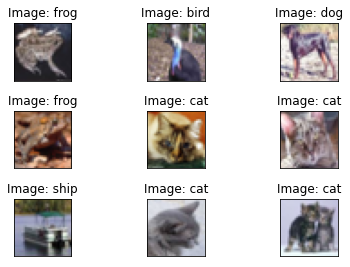

In [3]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i])
  plt.title(f'Image: {labels[y_train[i][0]]}')
  plt.xticks([])
  plt.yticks([])

In [4]:
num_classes = 10

x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')

# Normalization (max)
x_train /= 255
x_valid /= 255
x_test /= 255

# One hot encoding for labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [5]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

# Multi-layer Perceptron

In [6]:
# (batch size, w, h, channel)
x_train.shape, x_valid.shape, x_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
# rgb to grayscale
gray_x_train = tf.image.rgb_to_grayscale(x_train).numpy()
gray_x_valid = tf.image.rgb_to_grayscale(x_valid).numpy()
gray_x_test = tf.image.rgb_to_grayscale(x_test).numpy()

# flatten
gray_x_train = gray_x_train.reshape(len(gray_x_train), -1)
gray_x_valid = gray_x_valid.reshape(len(gray_x_valid), -1)
gray_x_test = gray_x_test.reshape(len(gray_x_test), -1)

In [8]:
# (batch size, num_pixel)
gray_x_train.shape, gray_x_valid.shape, gray_x_test.shape 

((40000, 1024), (10000, 1024), (10000, 1024))

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(gray_x_train.shape[1:])))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

# output
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 594,922
Trainable params: 594,922
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
313/313 [==============================] - 2s 5ms/step - loss: 2.1614 - accuracy: 0.1955 - val_loss: 2.0408 - val_accuracy: 0.2703
Epoch 2/50
313/313 [==============================] - 1s 5ms/step - loss: 2.0075 - accuracy: 0.2737 - val_loss: 1.9688 - val_accuracy: 0.2987
Epoch 3/50
313/313 [==============================] - 1s 5ms/step - loss: 1.9409 - accuracy: 0.3000 - val_loss: 1.9289 - val_accuracy: 0.3114
Epoch 4/50
313/313 [==============================] - 1s 5ms/step - loss: 1.8833 - accuracy: 0.3230 - val_loss: 1.8757 - val_accuracy: 0.3257
Epoch 5/50
313/313 [==============================] - 1s 5ms/step - loss: 1.8404 - accuracy: 0.3390 - val_loss: 1.8740 - val_accuracy: 0.3296
Epoch 6/50
313/313 [==============================] - 1s 5ms/step - loss: 1.8104 - accuracy: 0.3504 - val_loss: 1.8174 - val_accuracy: 0.3504
Epoch 7/50
313/313 [==============================] - 1s 5ms/step - loss: 1.7817 - accuracy: 0.3615 - val_loss: 1.8007 - val_accuracy: 0.3582
Epoch 

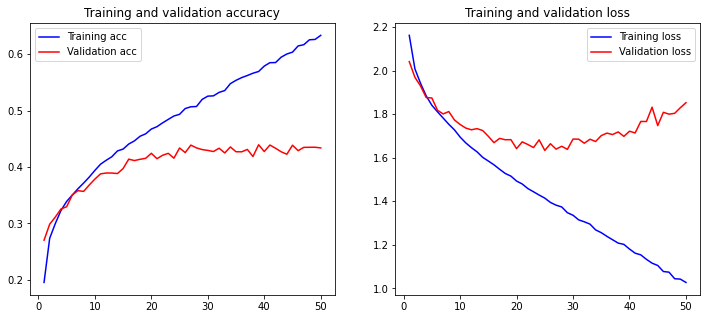

In [10]:
# pip install tensorflow-gpu

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(gray_x_train, y_train, batch_size=128, epochs=50, 
                    validation_data=(gray_x_valid, y_valid))
plot_history(history)

In [11]:
model.evaluate(gray_x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8590 - accuracy: 0.4255


[1.8590360879898071, 0.4255000054836273]

# Convolutional Neural Network

<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" width=500>

_* Image is taken from: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53_


<img src="https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_02_17A-ConvolutionalNeuralNetworks-WHITEBG.png" width=400>

_** Image is taken from: https://www.ibm.com/cloud/learn/convolutional-neural-networks_

In [12]:
model = tf.keras.models.Sequential()

# Feature extractor
model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same',
                 input_shape=x_train.shape[1:], activation='relu'))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Flatten())

# MLP - classifier
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 128)       9728      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        36896     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 3,738,666
Trainable params: 3,738,666
Non-trainable params: 0
____________________________________________

Epoch 1/10
313/313 [==============================] - 160s 512ms/step - loss: 1.5704 - accuracy: 0.4313 - val_loss: 1.3235 - val_accuracy: 0.5257
Epoch 2/10
313/313 [==============================] - 159s 509ms/step - loss: 1.2280 - accuracy: 0.5622 - val_loss: 1.1546 - val_accuracy: 0.5992
Epoch 3/10
313/313 [==============================] - 171s 546ms/step - loss: 1.0175 - accuracy: 0.6399 - val_loss: 1.0695 - val_accuracy: 0.6289
Epoch 4/10
313/313 [==============================] - 168s 535ms/step - loss: 0.8372 - accuracy: 0.7041 - val_loss: 1.0136 - val_accuracy: 0.6501
Epoch 5/10
313/313 [==============================] - 168s 537ms/step - loss: 0.6716 - accuracy: 0.7652 - val_loss: 1.0055 - val_accuracy: 0.6635
Epoch 6/10
313/313 [==============================] - 164s 523ms/step - loss: 0.5094 - accuracy: 0.8259 - val_loss: 1.0566 - val_accuracy: 0.6586
Epoch 7/10
313/313 [==============================] - 163s 521ms/step - loss: 0.3521 - accuracy: 0.8802 - val_loss: 1.2149 -

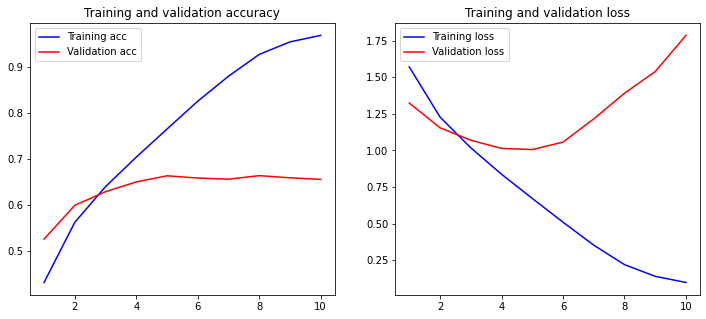

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_valid, y_valid))
plot_history(history)

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.8404 - accuracy: 0.6472


[1.8404295444488525, 0.6471999883651733]

In [15]:
predict = model.predict(x_test[:10])
predict = [np.argmax(i) for i in predict]

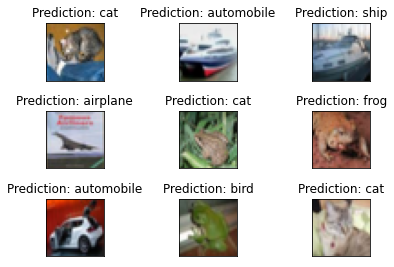

In [16]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_test[i])
  plt.title(f'Prediction: {labels[predict[i]]}')
  plt.xticks([])
  plt.yticks([])